# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### Assignment 4: Implementing your Recurrent Neural Network from Scratch and Cross-Language Word Embeddings 

### **Total points: 100**

<br>
In this assignment, you will implement key components of a Recurrent Neural Network in numpy and and Cross-Language Word Embeddings
.<br>
<p> ####Note  : Please load images of "1.1-RNN Cell" and "1.2-RNN Forward Pass" at respective cells by going through Edit tab and clicking "insert image" option.</p>

# <CENTER> PART-A</CENTER> 

<p>Recurrent Neural Networks (RNN) are very effective for Natural Language Processing and other sequence tasks because they have "memory". They can read inputs $x^{\langle t \rangle}$ (such as words) one at a time, and remember some information/context through the hidden layer activations that get passed from one time-step to the next. This allows a unidirectional RNN to take information from the past to process later inputs. A bidirectional RNN can take context from both the past and the future.
</p>
<h4>Notation:</h4>

1. Superscript $[l]$ denotes an object associated with the $l^{th}$ layer. Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.

2. Superscript $(i)$ denotes an object associated with the $i^{th}$ example. Example: $x^{(i)}$ is the $i^{th}$ training example input.

3. Superscript $\langle t \rangle$ denotes an object at the $t^{th}$ time-step. Example: $x^{\langle t \rangle}$ is the input x at the $t^{th}$ time-step. $x^{(i)\langle t \rangle}$ is the input at the $t^{th}$ timestep of example $i$.

4. Subscript $i$ denotes the $i^{th}$ entry of a vector.Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$.



Let's first import all the packages that you will need during this assignment.

In [ ]:
import numpy as np

## 1 - Forward propagation for the basic RNN (50 Marks) <br>
In this task, you will generate music using an RNN. The basic RNN that you will implement has the structure below. In this example, $T_x = T_y$.<br>
<h3>Dimensions of input $x$</h3><br>
<h4>Input with $n_x$ number of units</h4><br>
1. For a single input example, $x^{(i)}$ is a one-dimensional input vector.<br>
2. Using language as an example, a language with a 5000 word vocabulary could be one-hot encoded into a vector that has 5000 units. So $x^{(i)}$ would have the shape (5000,).<br>
3. We'll use the notation $n_x$ to denote the number of units in a single training example.<br>
<h4>Batches of size $m$</h4>
1. Let's say we have mini-batches, each with 20 training examples.<br>
2. To benefit from vectorization, we'll stack 20 columns of $x^{(i)}$ examples into a 2D array (a matrix).<br>
3. For example, this tensor has the shape (5000,20).<br>
4. We'll use $m$ to denote the number of training examples.<br>
5. So the shape of a mini-batch is $(n_x,m)$<br>
<h4>Time steps of size $T_{x}$</h4>
1. A recurrent neural network has multiple time steps, which we'll index with $t$.<br>
2. A single training example $x^{(i)}$ (a vector) pass through multiple time steps $T_x$. For example, if there are 10 time steps, $T_{x} = 10$<br>
<h4>3D Tensor of shape $(n_{x},m,T_{x})$</h4>
1. The 3-dimensional tensor $x$ of shape $(n_x,m,T_x)$ represents the input $x$ that is fed into the RNN.<br>
<h4>Taking a 2D slice for each time step: $x^{\langle t \rangle}$</h4>
1. At each time step, we'll use a mini-batches of training examples (not just a single example).<br>
2. So, for each time step $t$, we'll use a 2D slice of shape $(n_x,m)$.<br>
3. We're referring to this 2D slice as $x^{\langle t \rangle}$. The variable name in the code is xt.<br>
<h4>Definition of hidden state $a$</h4>
1. The activation $a^{\langle t \rangle}$ that is passed to the RNN from one time step to another is called a "hidden state."<br>
<h4>Dimensions of hidden state $a$</h4><br>
1. Similar to the input tensor $x$, the hidden state for a single training example is a vector of length $n_{a}$.<br>
2. If we include a mini-batch of $m$ training examples, the shape of a mini-batch is $(n_{a},m)$.<br>
3. When we include the time step dimension, the shape of the hidden state is $(n_{a}, m, T_x)$<br>
4. We will loop through the time steps with index $t$, and work with a 2D slice of the 3D tensor.<br>
5. We'll refer to this 2D slice as $a^{\langle t \rangle}$.<br>
6. In the code, the variable names we use are either a_prev or a_next, depending on the function that's being implemented.<br>
7. The shape of this 2D slice is $(n_{a}, m)$<br>
<h4>Dimensions of prediction $\hat{y}$</h4><br>
1. Similar to the inputs and hidden states, $\hat{y}$ is a 3D tensor of shape $(n_{y}, m, T_{y})$. where 
 $n_{y}$: number of units in the vector representing the prediction.
$m$: number of examples in a mini-batch.
$T_{y}$: number of time steps in the prediction.<br>
2. For a single time step $t$, a 2D slice $\hat{y}^{\langle t \rangle}$ has shape $(n_{y}, m)$.<br>
3. In the code, the variable names are:
y_pred: $\hat{y}$
yt_pred: $\hat{y}^{\langle t \rangle}$<br>
Here's how you can implement an RNN:<br>

<h4>Steps:</h4><br>

1. Implement the calculations needed for one time-step of the RNN.<br>
2. Implement a loop over $T_x$ time-steps in order to process all the inputs, one at a time.<br>

### 1.1 - RNN cell<br>
A recurrent neural network can be seen as the repeated use of a single cell. You are first going to implement the computations for a single time-step. The following figure describes the operations for a single time-step of an RNN cell.



(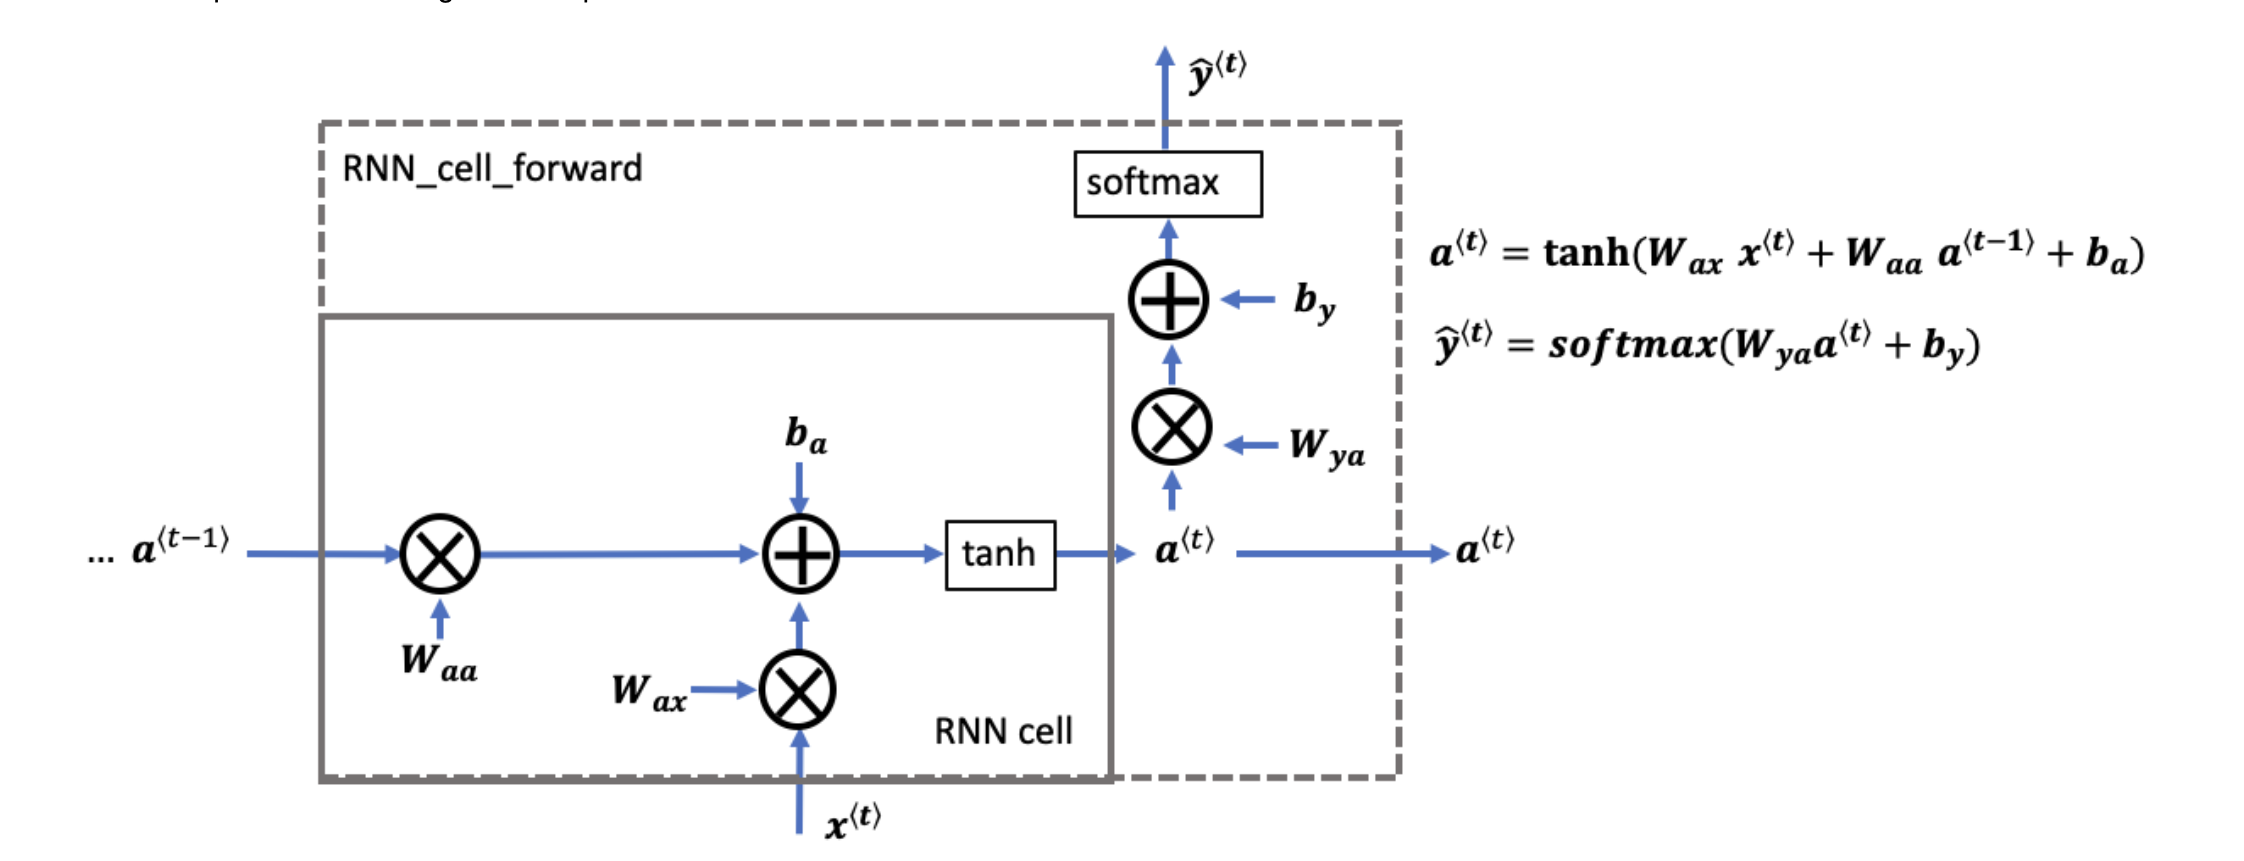)))

#### RNN cell versus RNN_cell_forward:<br>

1. Note that an RNN cell outputs the hidden state $a^{\langle t \rangle}$.<br>
2. RNN cell is shown in the figure as the inner box with solid lines<br>
3. The function that you'll implement, rnn_cell_forward, also calculates the prediction $\hat{y}^{\langle t \rangle}$<br>
4. RNN_cell_forward is shown in the figure as the outer box with dashed lines<br>

<h3>Exercise 1 - rnn_cell_forward</h3><br>
Implement the RNN cell described in Figure 2.<br>

<h4>Instructions:</h4>

1. Compute the hidden state with tanh activation: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$
2. Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. (The function softmax is provided)
3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in a cache
4. Return $a^{\langle t \rangle}$ , $\hat{y}^{\langle t \rangle}$ and cache


In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [ ]:
# GRADED FUNCTION: rnn_cell_forward

def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"(Please refer following cell to define parameters)
    Wax = None
    Waa = None
    Wya = None
    ba = None
    by = None
    
    # compute next activation state using the formula given above
    a_next = None
    # compute output of the current cell using the formula given above
    yt_pred = None
    
    # store values you need for backward propagation in cache as a tuple.
    cache = None
    
    return None,None,None

In [ ]:
np.random.seed(1)
xt_tmp = np.random.randn(3, 10)
a_prev_tmp = np.random.randn(5, 10)
parameters_tmp = {}
parameters_tmp['Waa'] = None
parameters_tmp['Wax'] = None
parameters_tmp['Wya'] = None
parameters_tmp['ba'] = np.random.randn(5, 1)
parameters_tmp['by'] = None

a_next_tmp, yt_pred_tmp, cache_tmp = rnn_cell_forward(None, None, None)
print("a_next[4] = \n", a_next_tmp[4])
print("a_next.shape = \n", a_next_tmp.shape)
print("yt_pred[1] =\n", yt_pred_tmp[1])
print("yt_pred.shape = \n", yt_pred_tmp.shape)


<h5>Expected Output:</h5>

a_next[4] = 
 [ 0.59584544,  0.18141802,  0.61311866,  0.99808218,  0.85016201,  0.99980978,
 -0.18887155,  0.99815551,  0.6531151,   0.82872037] <br>
a_next.shape = 
 (5, 10)<br>
yt_pred[1] =
 [ 0.9888161,   0.01682021,  0.21140899,  0.36817467,  0.98988387,  0.88945212,
  0.36920224,  0.9966312,   0.9982559,   0.17746526]<br>
yt_pred.shape = 
 (2, 10)<br>

### 1.2 - RNN Forward Pass <br>
1. A recurrent neural network (RNN) is a repetition of the RNN cell that you've just built.<br>
2. If your input sequence of data is 10 time steps long, then you will re-use the RNN cell 10 times<br>
3. Each cell takes two inputs at each time step:<br>
3. (a)$a^{\langle t-1 \rangle}$: The hidden state from the previous cell<br>
3. (b)$x^{\langle t \rangle}$: The current time step's input data<br>
4. It has two outputs at each time step:<br>
4. (a)A hidden state ($a^{\langle t \rangle}$)<br>
4. (b)A prediction ($y^{\langle t \rangle}$)<br>
5. The weights and biases $(W_{aa}, b_{a}, W_{ax}, b_{x})$ are re-used each time step. They are maintained between calls to rnn_cell_forward in the 'parameters' dictionary

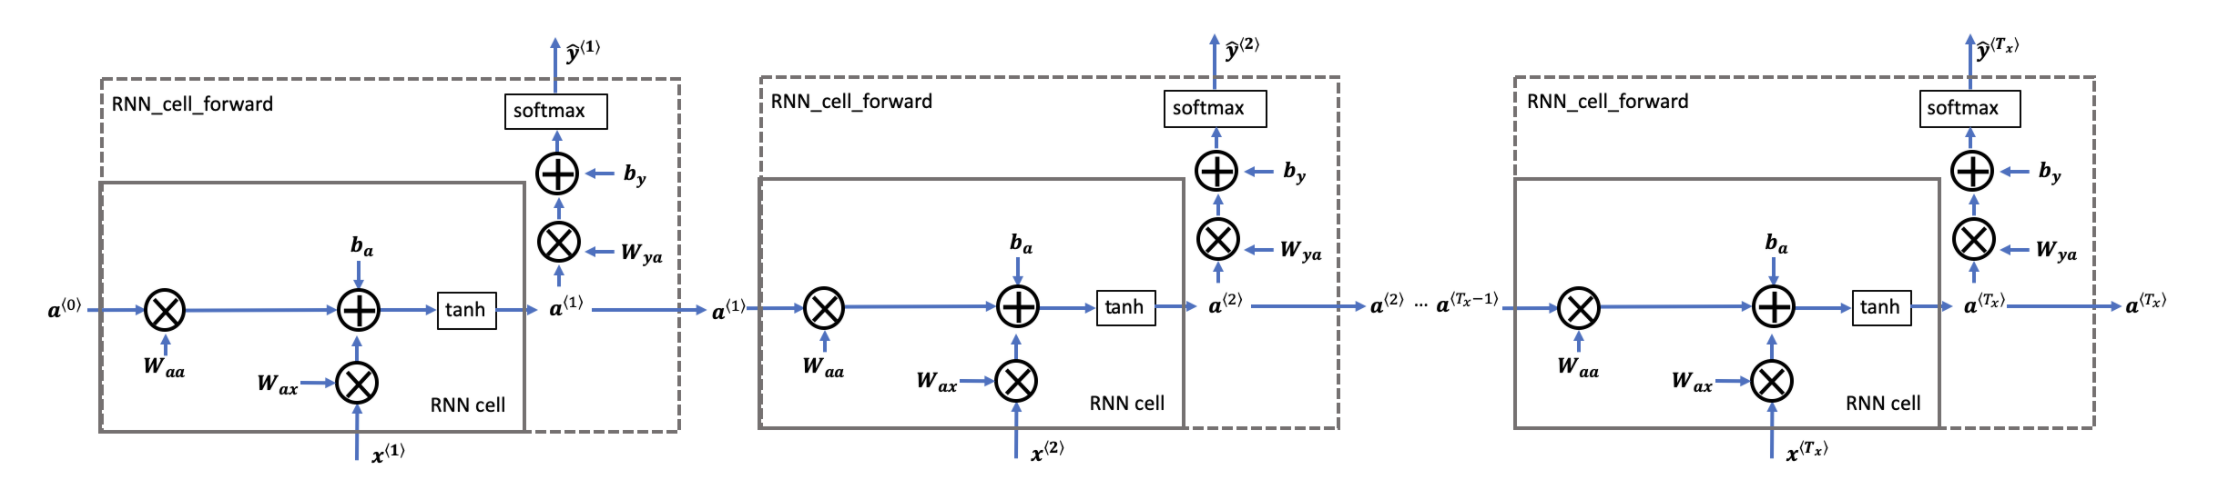![1.2-RNN%20Forward%20Pass.png](attachment:1.2-RNN%20Forward%20Pass.png)

#### rnn_forward  <br>
Implement the forward propagation of the RNN described in Figure .<br>

<h4>Instructions:</h4><br>

1. Create a 3D array of zeros, $a$ of shape $(n_{a}, m, T_{x})$ that will store all the hidden states computed by the RNN<br>
2. Create a 3D array of zeros, $\hat{y}$, of shape $(n_{y}, m, T_{x})$ that will store the predictions. Note that in this case, $T_{y} = T_{x}$ (the prediction and input have the same number of time steps)<br>
3. Initialize the 2D hidden state a_next by setting it equal to the initial hidden state, $a_{0}$<br>
4. At each time step $t$:<br>
4. (a)Get $x^{\langle t \rangle}$, which is a 2D slice of $x$ for a single time step $t$. $x^{\langle t \rangle}$ has shape $(n_{x}, m)$
$x$ has shape. $(n_{x}, m, T_{x})$<br>
4. (b)Update the 2D hidden state $a^{\langle t \rangle}$ (variable name a_next), the prediction $\hat{y}^{\langle t \rangle}$ and the cache by running rnn_cell_forward. $a^{\langle t \rangle}$ has shape $(n_{a}, m)$<br>
4. (c)Store the 2D hidden state in the 3D tensor $a$, at the $t^{th}$ position. 
$a$ has shape $(n_{a}, m, T_{x})$<br>
4. (d)Store the 2D $\hat{y}^{\langle t \rangle}$ prediction (variable name yt_pred) in the 3D tensor $\hat{y}_{pred}$ at the $t^{th}$ position. $\hat{y}^{\langle t \rangle}$ has shape $(n_{y}, m)$. $\hat{y}$ has shape $(n_{y}, m, T_x)$<br>
4. (e)Append the cache to the list of caches<br>
5. Return the 3D tensor $a$ and $\hat{y}$, as well as the list of caches<br>

In [ ]:
def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x =None
    n_y, n_a = None
    
    
    # initialize "a" and "y_pred" with zeros (≈2 lines)
    a = None
    y_pred = None
    
    # Initialize a_next (≈1 line)
    a_next = a0
    
    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        a_next, yt_pred, cache = None
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] =None
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = None
        # Append "cache" to "caches" (≈1 line)
        caches.append(None)
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (None, None)
    
    return None, None, None

In [ ]:
#initialize these values using np.random.randn($,$,$) where "$" = integer
np.random.seed(1)
x_tmp = np.random.randn(3, 10, 4)
a0_tmp = None
parameters_tmp = {}
parameters_tmp['Waa'] = None
parameters_tmp['Wax'] = None
parameters_tmp['Wya'] = None
parameters_tmp['ba'] = None
parameters_tmp['by'] = None

a_tmp, y_pred_tmp, caches_tmp = rnn_forward(None, None, None)
print("a[4][1] = \n", a_tmp[4][1])
print("a.shape = \n", a_tmp.shape)
print("y_pred[1][3] =\n", y_pred_tmp[1][3])
print("y_pred.shape = \n", y_pred_tmp.shape)
print("caches[1][1][3] =\n", caches_tmp[1][1][3])
print("len(caches) = \n", len(caches_tmp))


<h4>Expected Output:</h4>

a[4][1] = 
 [-0.99999375,   0.77911235,  -0.99861469,  -0.99833267]<br>
a.shape = 
 (5, 10, 4)<br>
y_pred[1][3] =
 [ 0.79560373,   0.86224861,   0.11118257,   0.81515947]<br>
y_pred.shape = 
 (2, 10, 4)<br>
caches[1][1][3] =
 [-1.1425182,   -0.34934272,  -0.20889423,   0.58662319]<br>
len(caches) = 
 2<br>

# <CENTER> PART-B</CENTER>


## 2 Cross-Language Word Embeddings (50 Marks)           

In this assignment, you will consider a common method of evaluating word embeddings: by judging the usefulness of pairwise distances between words in the embedding space.<br>

Follow along with the examples in this notebook, and implement the sections of code flagged with TODO.

In [ ]:
import gensim
import numpy as np
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

We'll start by downloading a plain-text version of the Shakespeare plays.

In [ ]:
!wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/shakespeare_plays.txt
lines = [s.split() for s in open('shakespeare_plays.txt')]

Then, we'll estimate a simple word2vec model on the Shakespeare texts.

In [ ]:
model = Word2Vec(None)

Even with such a small training set size, you can perform some standard analogy tasks.

In [ ]:
model.wv.most_similar(positive=None, negative=None)

For the rest of this assignment, we will focus on finding words with similar embeddings, both within and across languages. For example, what words are similar to the name of the title character of Othello?

In [ ]:
model.wv.most_similar(positive=None)

This search uses cosine similarity. In the default API, you should see the same similarity between the words othello and desdemona as in the search results above.

In [ ]:
model.wv.similarity(None, None)

### 2.1 Implement Cosim
TODO: Your first task, therefore, is to implement your own cosine similarity function so that you can reuse it outside of the context of the gensim model object.

In [ ]:
def cosim(v1, v2): 
    return None

cosim(model.wv['othello'], model.wv['desdemona'])

 **Evaluation**: 

We could collect a lot of human judgments about how similar pairs of words, or pairs of Shakespearean characters, are. Then we could compare different word-embedding models by their ability to replicate these human judgments.<br>

If we extend our ambition to multiple languages, however, we can use a word translation task to evaluate word embeddings.<br>

We will use a subset of Facebook AI's FastText cross-language embeddings for several languages. Your task will be to compare English both to French, and to one more language from the following set: Arabic, German, Portuguese, Russian, Spanish, Vietnamese, and Chinese.<br>

In [ ]:
!wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.en.vec
!wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.fr.vec

# TODO: uncomment at least one of these to work with another language
!wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.ar.vec
#!wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.de.vec
# !wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.pt.vec
# !wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.ru.vec
# !wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.es.vec
# !wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.vi.vec
# !wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/30k.zh.vec

We'll start by loading the word vectors from their textual file format to a dictionary mapping words to numpy arrays.

In [ ]:
def vecref(s):
    (word, srec) = s.split(' ', 1)
    return (word, np.fromstring(srec, sep=' '))

def ftvectors(fname):
    return { k:v for (k, v) in [vecref(s) for s in open(fname)] if len(v) > 1} 

# loading vectors for english and french languages.
envec = ftvectors('30k.en.vec')
frvec = ftvectors('30k.fr.vec')

# TODO: load vectors for one more language, such as zhvec (Chinese) just like english or french


### 2.2 Implement search 

TODO: Your next task is to write a simple function that takes a vector and a dictionary of vectors and finds the most similar item in the dictionary. For this assignment, a linear scan through the dictionary using your cosim function from above is acceptible.</br>

Some matches make more sense than others. Note that computer most closely matches informatique, the French term for computer science. If you looked further down the list, you would see ordinateur, the term for computer. This is one weakness of a focus only on embeddings for word types independent of context.</br>

To evalute cross-language embeddings more broadly, we'll look at a dataset of links between Wikipedia articles.</br>

In [ ]:
## TODO: implement this search function
def mostSimilar(vec, vecDict):
  ## Use your cosim function from above
    mostSimilar = ''
    similarity = 0
    for row in vecDict.items():
        csm = cosim(None, None)
        if None:
            similarity = None
            mostSimilar = None
    return (mostSimilar, similarity)

## some example searches
[mostSimilar(envec[e], frvec) for e in ['computer', 'germany', 'matrix', 'physics', 'yeast']]

In [ ]:
!wget http://www.ccs.neu.edu/home/dasmith/courses/cs6120/links.tab
links = [s.split() for s in open('links.tab')]

In [ ]:
links[302]

### 2.3 Evaluate embeddings
TODO: Evaluate the English and French embeddings by computing the proportion of English Wikipedia articles whose corresponding French article is also the closest word in embedding space. Skip English articles not covered by the word embedding dictionary. Since many articles, e.g., about named entities have the same title in English and French, compute the baseline accuracy achieved by simply echoing the English title as if it were French. Remember to iterate only over English Wikipedia articles, not the entire embedding dictionary.

In [ ]:
## TODO: Compute English-French Wikipedia retrieval accuracy.
t = 0
b = 0
g = 0
for row in links:
    if row[1] == 'fr':
        if row[0] in envec.keys():
            t += 1
            if row[0] == row[2]:
                b += 1
            similar, _ = mostSimilar(None, None)
            if None:
                g += 1

baselineAccuracy = b/t
accuracy = g/t

In [ ]:
print(baselineAccuracy, accuracy)

### 2.4 Compute accuracy
TODO: Compute accuracy and baseline (identity function) acccuracy for Englsih and another language besides French. Although the baseline will be lower for languages not written in the Roman alphabet (i.e., Arabic or Chinese), there are still many articles in those languages with headwords written in Roman characters.

In [ ]:
## TODO: Compute English-X Wikipedia retrieval accuracy.
#Follow the above procedure to do this task.

print(baselineAccuracy, accuracy)